# <span style="color:blue">Course Plan 11/18/2019</span>
## <span style="color:blue">(Last Updated 11/8/2019)</span>

## Updated schedule through the rest of the semester

|  Wk   |  M    |  W     | Topic   | Notebooks | Due |
| :---: | :---: | :----: | :------ | :----- | :---: |
|  8  |  10/21  | 23  | **Numpy:** Data Abstraction, **Numpy:** Multi-dimensional arrays,  | Midterm, 03-01, 03-02 | 10/30 |
|  9  |  28  | 30  | **Numpy:** Reading into multi-dimensional arrays, **Pandas:** Dataframes and reading into them;  Merging and matching Dataframes| 03-03, 03-04, 03-05 | 10/30 |
|  10  |  11/4  | 6  | **Pandas:** , Series and Views; Wrap Up Unit 3| 03-06, 03-07 | 11/10 |
|  11 |  &mdash; | 13   | Classification and Clustering, **Case Study:** Iris Data Set | 04-02, 04-03  | 11/17 |
|   |    |    | Notebooks under development&dagger;  | <del>04-04, 04-06, 04-07</del>  |
|  12 |  18  | 20  | _k_-means Clustering, **Case Study:** [World Happiness Report](https://worldhappiness.report/ed/2019/)  | 04-04, 05-01 | 11/24 |
|  13 |  25   | &mdash;  | [Geopandas](http://geopandas.org/), **Case Study:** World Happiness Map | 05-03 | 12/01 |
|  14 |  12/2 | 4 |  **Case Study:** Twitter Sentiment Analysis | 05-04 | 12/08 |
|  16 |  | 12/13 | **(Take Home) Final Exam**  |

&dagger; We will not be covering these notebooks this semester. Feel free to peruse them if interested.



# _k_-means Clustering:

_k_-means is an algorithm for clustering data points into groups, also known as "_k_ centroids." 

Begin with a review of the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

<img align="right" style="padding-left:10px; height: 24%; width: 24%;" src="figures/iris_with_labels.jpg">

This first exercise is based on the Iris dataset, though, in this case, the data is not provided to you. You need to bring it yourself. Consult the [previous exercise](../04-03-clustering/04-03-clustering.ipynb) if necessary; load the data into a dataframe and display it. The adjoining figure serves to explain the feature names.

Acknowledgment: The first half of this exercise was based on [this Kaggle page](https://www.kaggle.com/tonzowonzo/simple-k-means-clustering-on-the-iris-dataset).

Hint: Use `dir()` to probe into the data.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from sklearn import datasets
...

In this case, we do know there are 3 classes but what if we didn't? What _k_ should we pick?

'The elbow method' is often used to pick _k_.

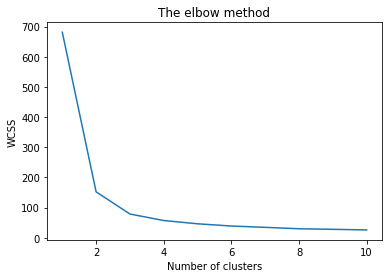

In [11]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(iris.data)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [ ]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(iris.data)

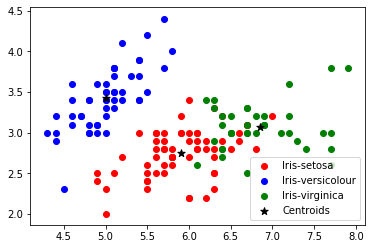

In [19]:
#Visualising the clusters
plt.scatter(iris.data[y_kmeans == 0, 0], iris.data[y_kmeans == 0, 1], c = 'red', label = 'Iris-setosa')
plt.scatter(iris.data[y_kmeans == 1, 0], iris.data[y_kmeans == 1, 1], c = 'blue', label = 'Iris-versicolour')
plt.scatter(iris.data[y_kmeans == 2, 0], iris.data[y_kmeans == 2, 1], c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], c = 'black', marker = '*', s = 60, label = 'Centroids')

plt.legend()

Pretty scatter plot but what are the x and y axes? **Your answer:** ______
<hr style="border-top: 1px dotted #ddd" />
<hr style="border-top: 1px dotted #ddd" />
<hr style="border-top: 1px dotted #ddd" />
<hr style="border-top: 1px dotted #ddd" />


Since we are limited to two-dimensional plots, how many different plots could we have drawn? (Switching x- and y-axes should not be considered a new plot). **Your answer:** ______
<hr style="border-top: 1px dotted #ddd" />
<hr style="border-top: 1px dotted #ddd" />
<hr style="border-top: 1px dotted #ddd" />
<hr style="border-top: 1px dotted #ddd" />

Since we are limited to two-dimensional plots, which _one_ plot should we use to show off our clustering? We want to use the plot that shows the best discrimination, in other words, the clusters should appear as _far apart_ as possible while appearing as _cohesive_ as possible. 

One way to answer this question is to draw each plot and make a visual judgment. 

The other is to write code that maximizes the distance between the centroids while minimizing the WCSS (within cluster sum of squares). Hint: Invent a metric, say total inter-centroid-distance divided by total WCSS and write code to discover the axes combination that maximizes this metric.

_Either approach is acceptable._ 

**Your answer below**.

**Bonus Question** (worth 5 extra points): Overlay the "best plot" created above with red asterisks to indicate points where the actual classification was 'Iris-setosa' but the algorithm yielded a different answer. Similarly, blue for 'Iris-versicolour' and green for 'Iris-virginica'.

Note, the code above assumes that `iris.data[y_kmeans == 0...]` implies 'Iris-setosa' but that isn't necessarily so! `iris.target` gave us the actual classifications but we had never used them until now!